In [ ]:
pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data?select=MELBOURNE_HOUSE_PRICES_LESS.csv")

Skipping, found downloaded files in "./melbourne-housing-market" (use force=True to force download)


In [ ]:

dataset= pd.read_csv("/content/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

# EDA Dataset NO NULL

In [ ]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
dataset["Date"]=pd.to_datetime(dataset.loc[:,"Date"],format='%d/%m/%Y')

In [ ]:
dataset["Date"]=(abs(dataset.loc[0,"Date"]-dataset.loc[:,"Date"])/ np.timedelta64(1, 'D')).astype(int)+1

In [ ]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
No_Null=dataset.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3b060aaa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3b060afe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3b060a6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3b060b3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3b060b640>],
 'means': []}

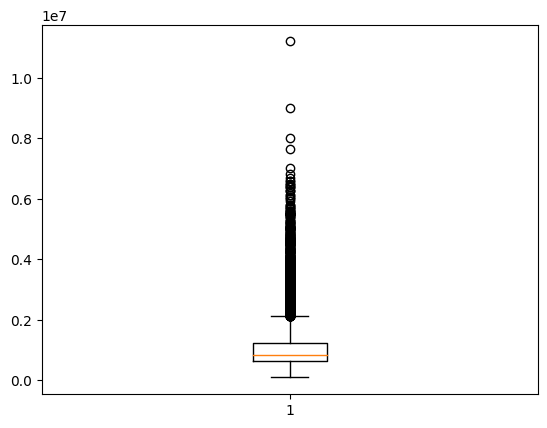

In [ ]:
plt.boxplot(No_Null["Price"])

<Axes: >

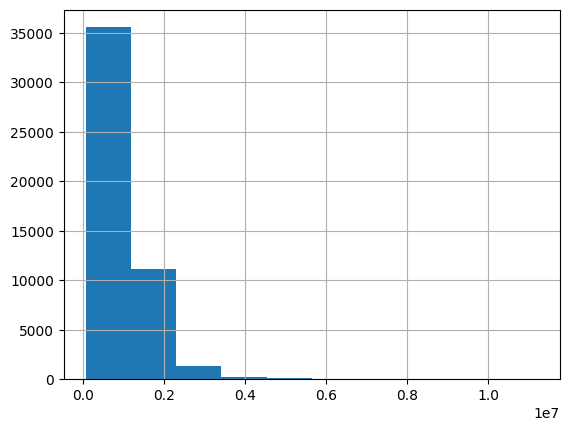

In [ ]:
No_Null["Price"].hist()

In [ ]:
# Mengecek berapa banyak postcode pada dataset

len(No_Null["Method"].unique())

5

In [ ]:
selected_dataset=No_Null[["Rooms","Type","Method","Price","Distance","Date","Propertycount"]]

In [ ]:
onehot_data=pd.get_dummies(selected_dataset,columns=["Type","Method"])
onehot_data=onehot_data.dropna()

In [ ]:
onehot_data.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,3,1490000.0,3.0,1,4019,True,False,False,False,True,False,False,False
1,3,1220000.0,3.0,1,4019,True,False,False,False,True,False,False,False
2,3,1420000.0,3.0,1,4019,True,False,False,False,True,False,False,False
3,3,1515000.0,7.5,1,1543,True,False,False,False,True,False,False,False
4,2,670000.0,10.4,1,3464,True,False,False,False,True,False,False,False


In [ ]:
onehot_data["Price"]=np.log(onehot_data["Price"])
onehot_data["Date"]=np.log(onehot_data["Date"])

In [ ]:
onehot_data.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,3,14.214287,3.0,0.0,4019,True,False,False,False,True,False,False,False
1,3,14.014361,3.0,0.0,4019,True,False,False,False,True,False,False,False
2,3,14.166167,3.0,0.0,4019,True,False,False,False,True,False,False,False
3,3,14.230926,7.5,0.0,1543,True,False,False,False,True,False,False,False
4,2,13.415033,10.4,0.0,3464,True,False,False,False,True,False,False,False


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

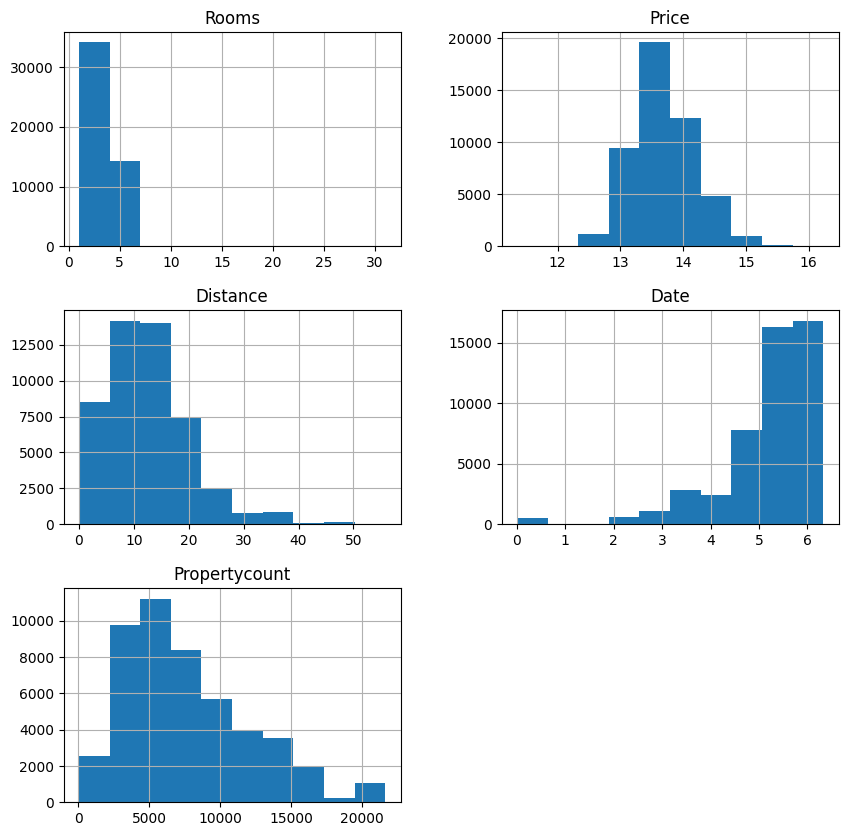

In [ ]:
onehot_data.hist(figsize=(10,10))

<Axes: >

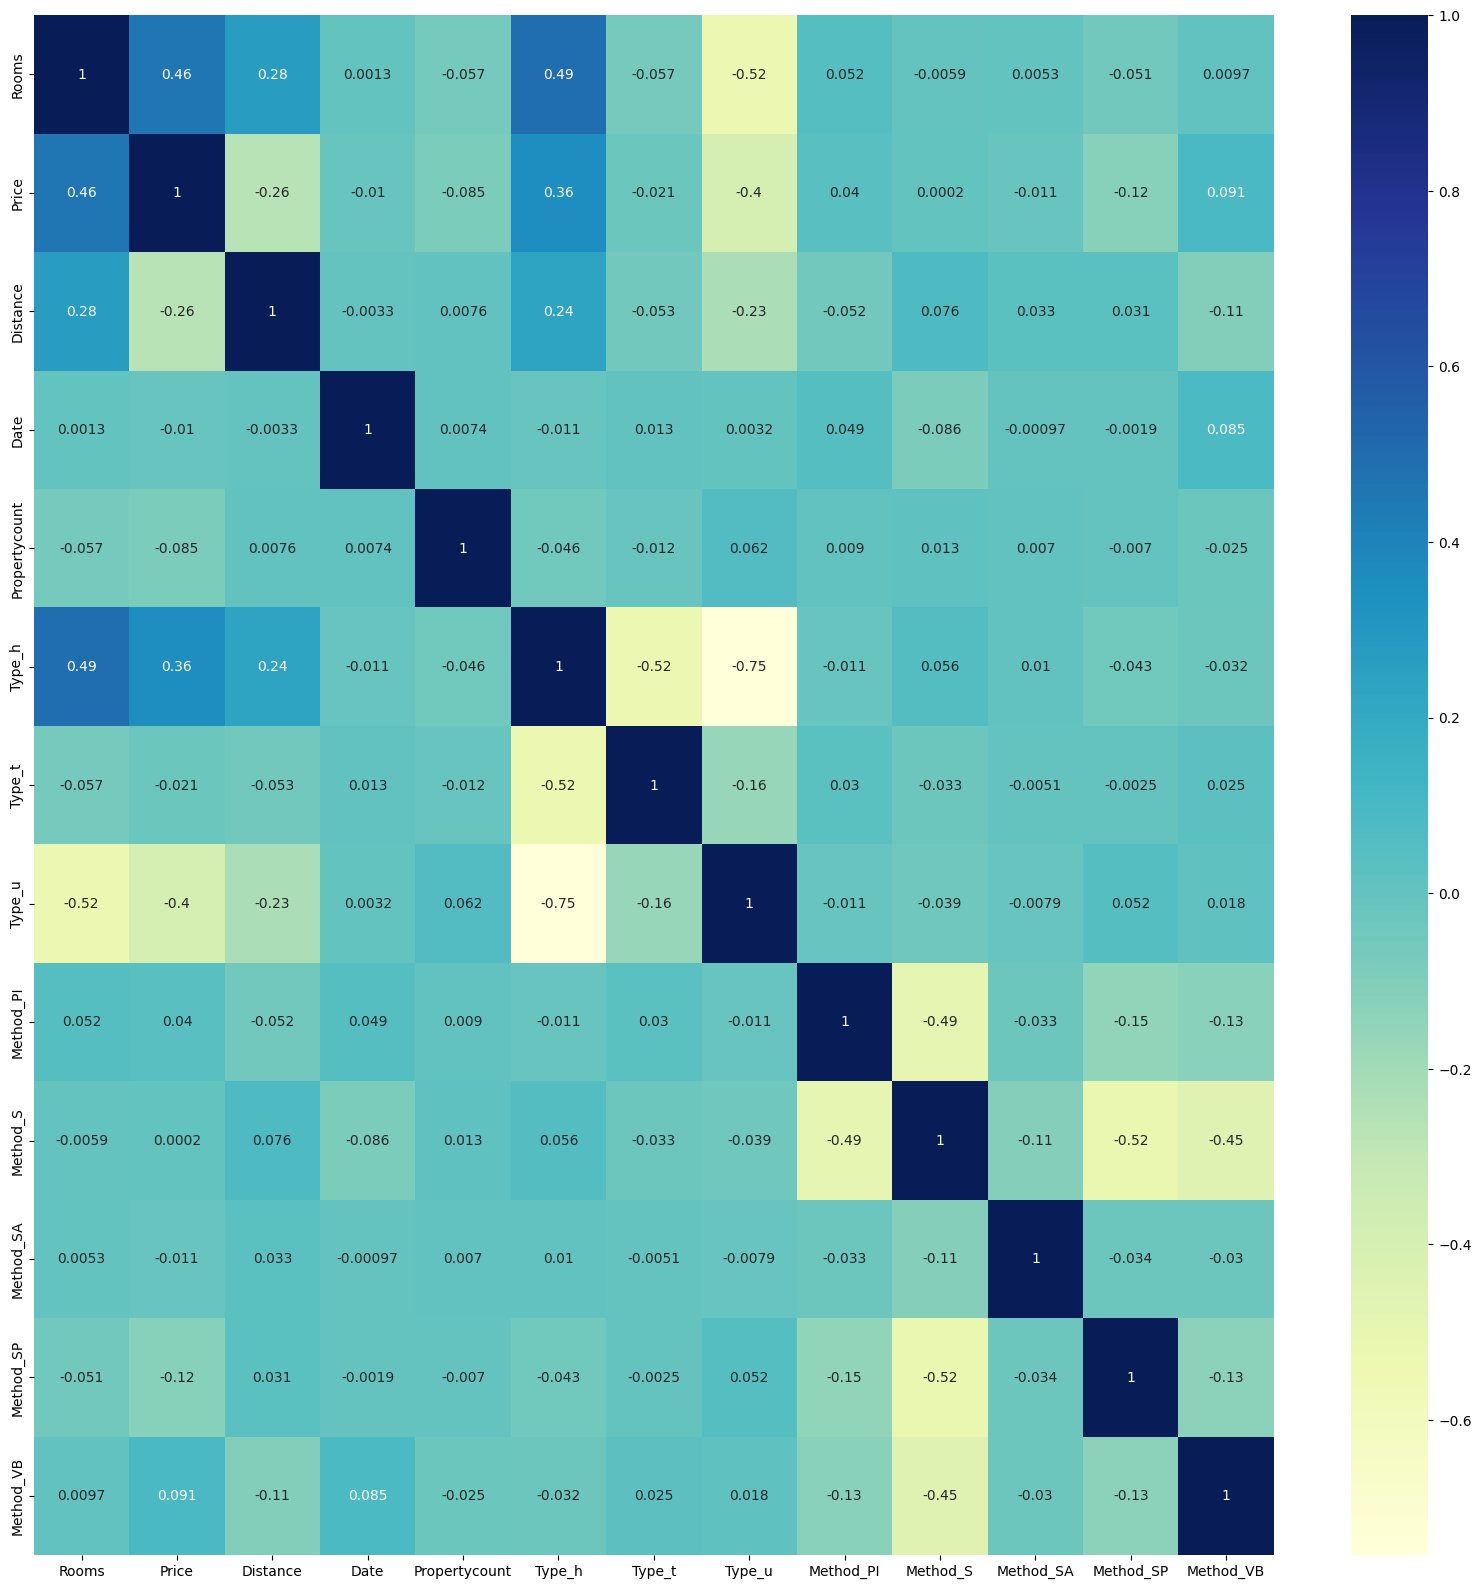

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(onehot_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
onehot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          48433 non-null  int64  
 1   Price          48433 non-null  float64
 2   Distance       48433 non-null  float64
 3   Date           48433 non-null  float64
 4   Propertycount  48433 non-null  int64  
 5   Type_h         48433 non-null  bool   
 6   Type_t         48433 non-null  bool   
 7   Type_u         48433 non-null  bool   
 8   Method_PI      48433 non-null  bool   
 9   Method_S       48433 non-null  bool   
 10  Method_SA      48433 non-null  bool   
 11  Method_SP      48433 non-null  bool   
 12  Method_VB      48433 non-null  bool   
dtypes: bool(8), float64(3), int64(2)
memory usage: 2.6 MB


# EDA NULL DATA

In [ ]:
Null_data=dataset[dataset.isnull().any(axis=1)]

In [ ]:
Null_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1,3021,Western Metropolitan,1899,14.0,Brimbank City Council
15,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
24,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
29,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1,3049,Northern Metropolitan,1130,16.5,Hume City Council
38,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1,3104,Southern Metropolitan,7809,9.7,Boroondara City Council


In [ ]:
selected_null_data=Null_data[["Rooms","Type","Method","Price","Distance","Date","Propertycount"]]

In [ ]:
onehot_data_null=pd.get_dummies(selected_null_data,columns=["Type","Method"])
onehot_data_null.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
8,6,NaN,14.0,1,1899,True,False,False,True,False,False,False,False,False,False,False,False
15,4,NaN,15.5,1,7630,True,False,False,False,False,False,False,True,False,False,False,False
24,4,NaN,10.2,1,3052,True,False,False,False,False,True,False,False,False,False,False,False
29,4,NaN,16.5,1,1130,True,False,False,False,False,False,False,True,False,False,False,False
38,3,NaN,9.7,1,7809,True,False,False,False,False,False,False,False,True,False,False,False


<Axes: >

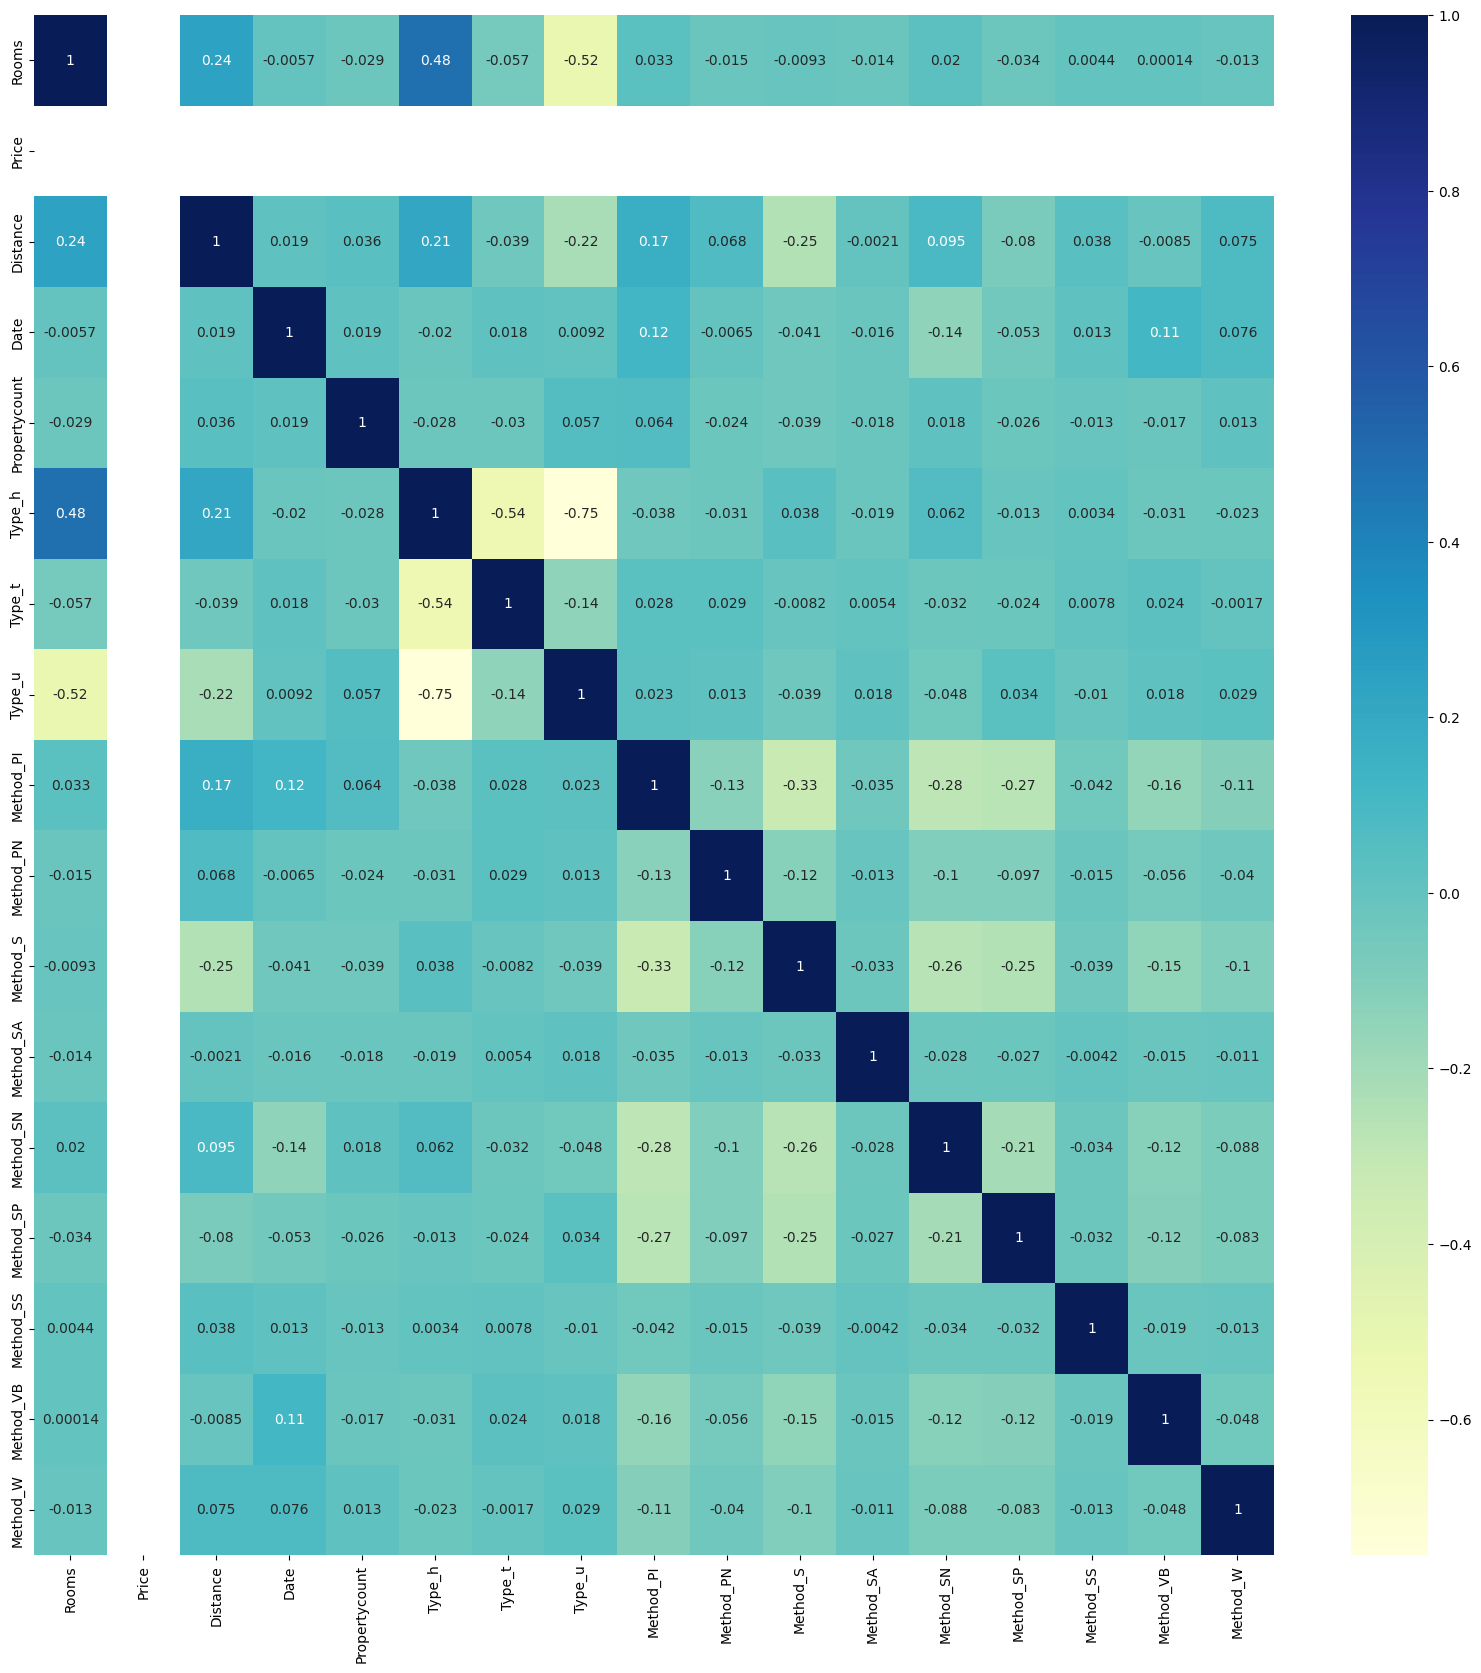

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(onehot_data_null.corr(),annot=True,cmap="YlGnBu")

# DROP METHOD PN SN SS W

In [ ]:
onehot_data.drop(["Method_SN","Method_SS","Method_PN"],axis=1,inplace=True)

In [ ]:
onehot_data_null.drop(["Method_W"],axis=1,inplace=True)

In [ ]:
onehot_data_null.drop(["Method_SN","Method_SS","Method_PN"],axis=1,inplace=True)

In [ ]:
onehot_data.drop(["Method_W"],axis=1,inplace=True)

<Axes: >

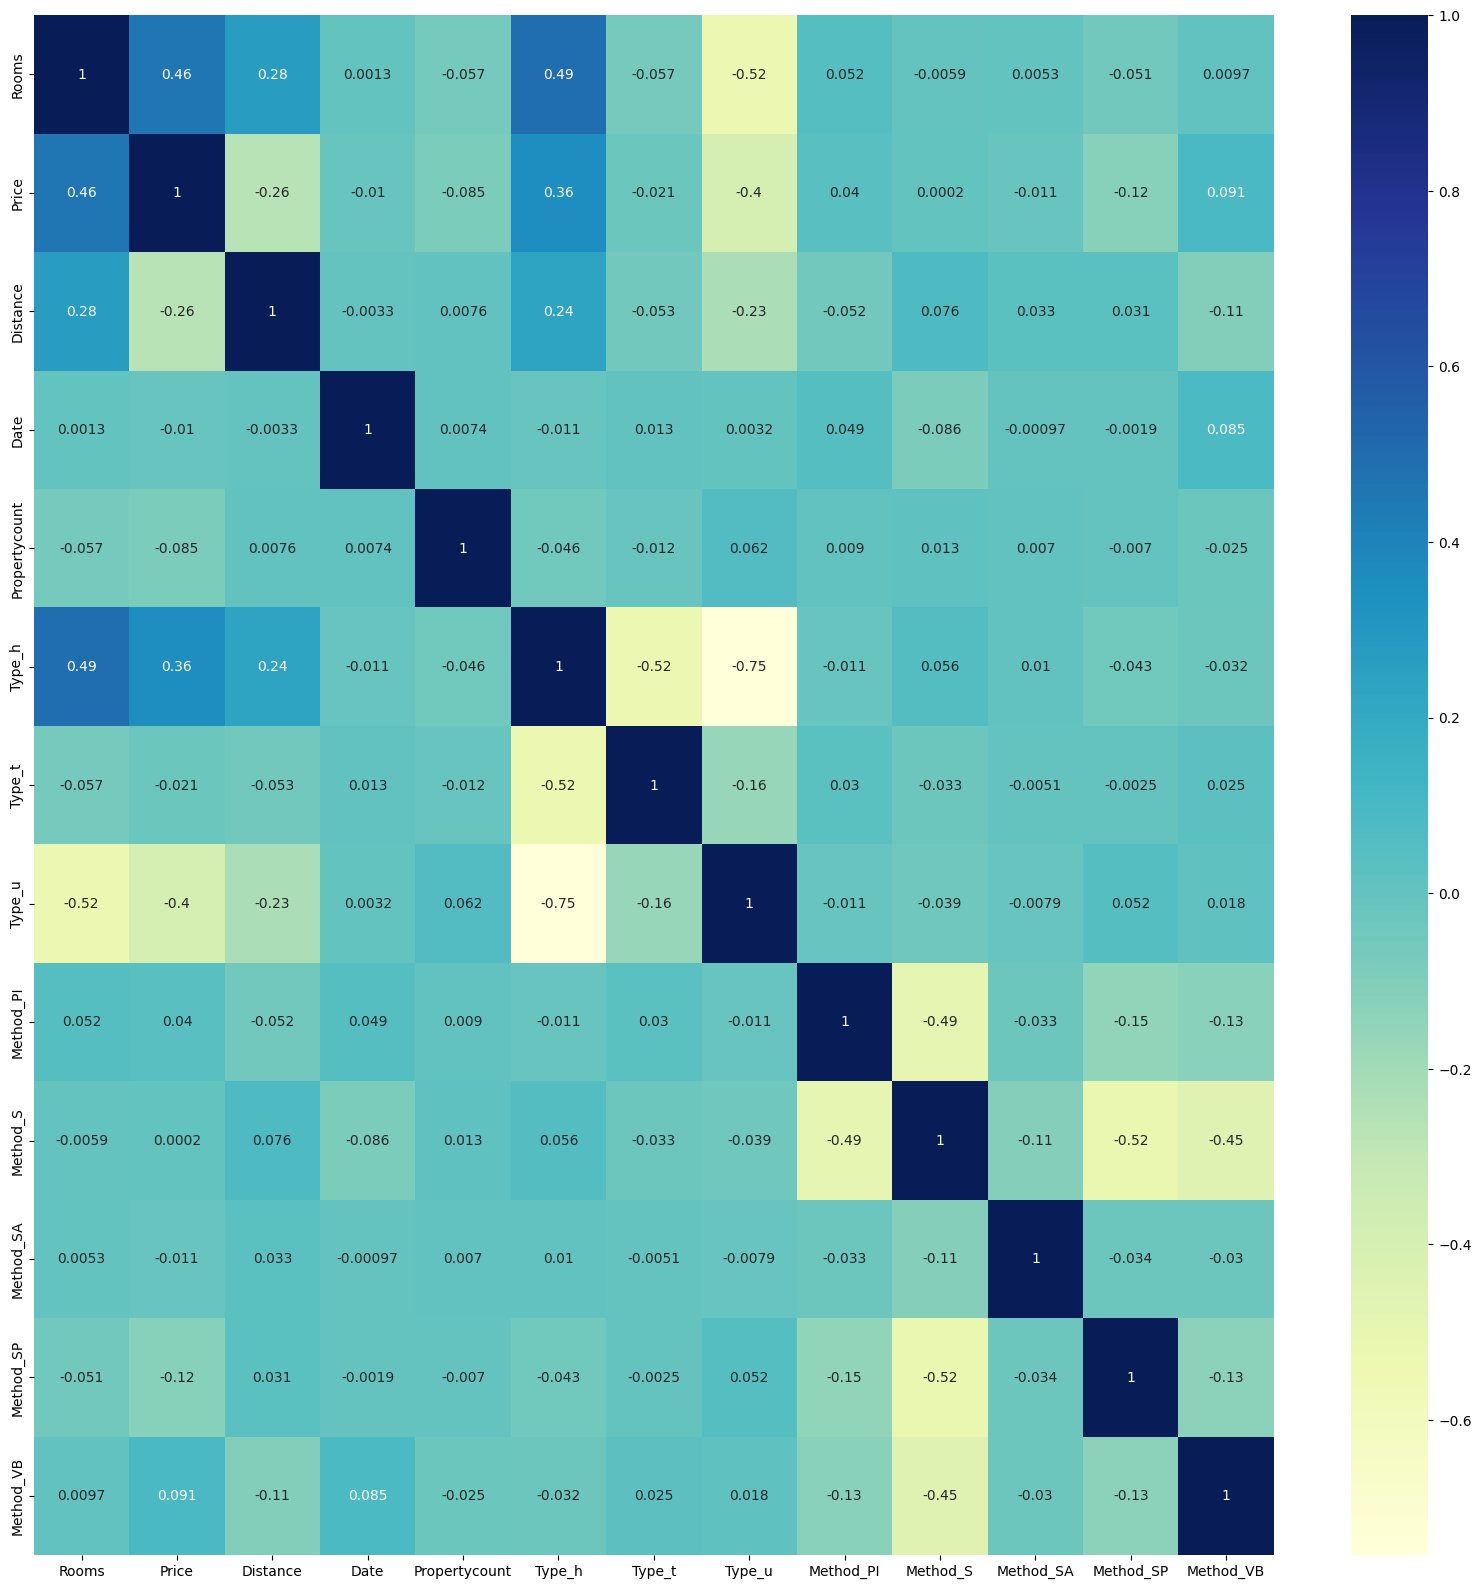

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(onehot_data.corr(),annot=True,cmap="YlGnBu")

<Axes: >

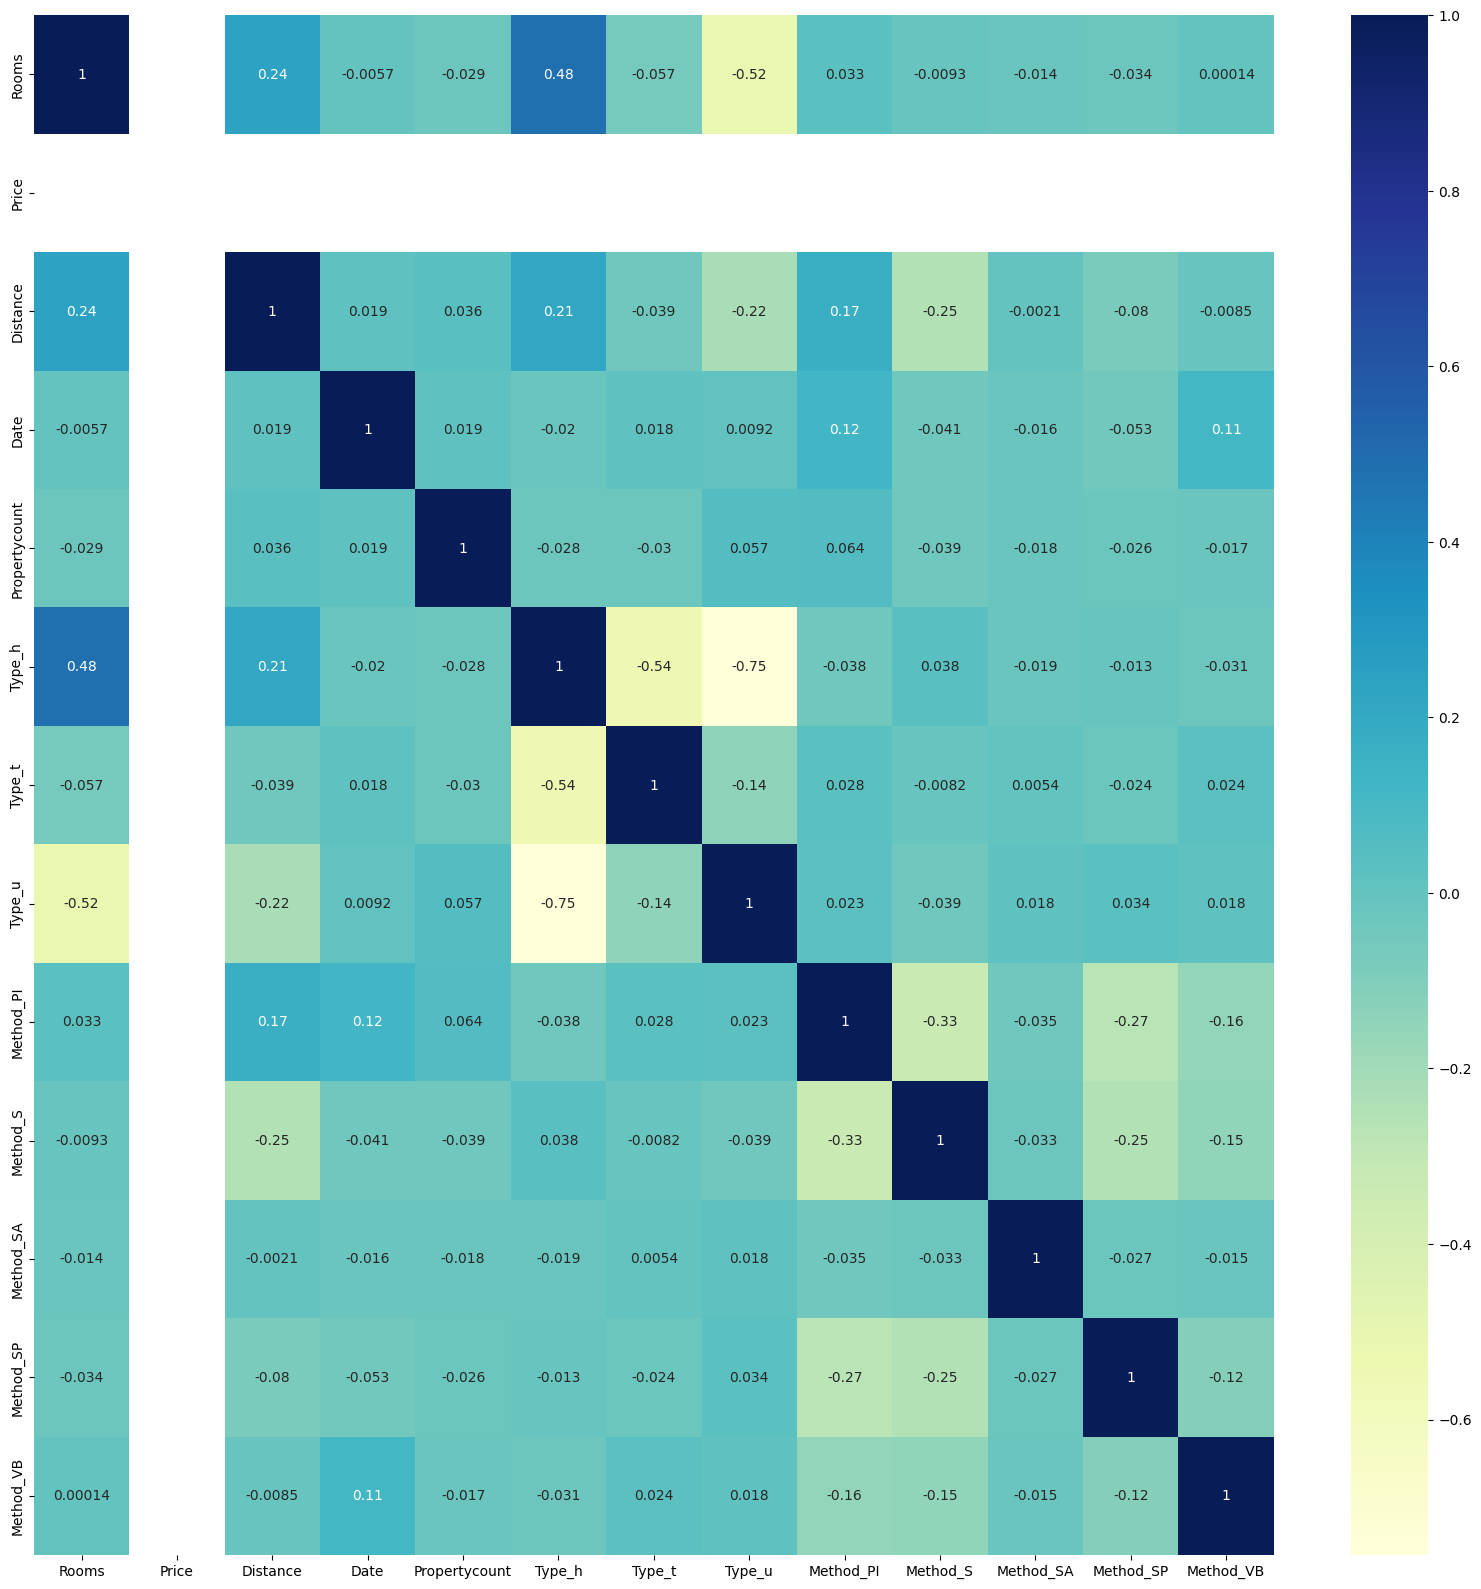

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(onehot_data_null.corr(),annot=True,cmap="YlGnBu")

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

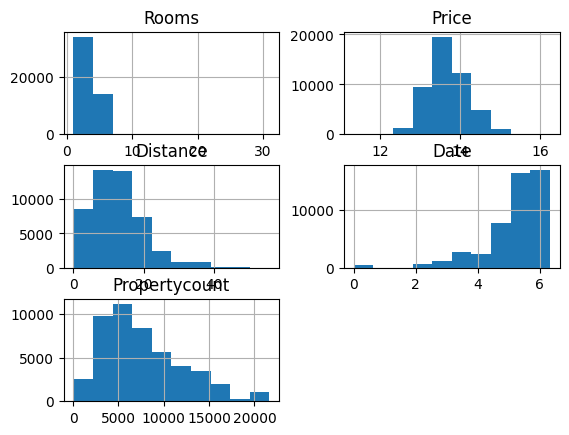

In [ ]:
onehot_data.hist()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
train, test, target_train, target_test = train_test_split(onehot_data.drop(["Price"],axis=1),onehot_data["Price"], test_size=0.2, random_state=42)
linear_reg=LinearRegression()


In [ ]:
linear_reg.fit(train,target_train)

LinearRegression()

In [ ]:
linear_reg.score(test,target_test)

0.4401863815175351

# Logistic Regression